### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

# 1. Open the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [2]:
df = pd.read_csv('311-service-requests.csv', dtype='unicode')

# 2. What's even in it? (the summary)


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [4]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024057399216,-73.90071711703163,"(40.640024057399216, -73.90071711703163)"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

In [17]:
df.sample(20)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Longitude,Location,created_date_year,created_date_month,created_date_hour,created_date_minute,closed_date_year,closed_date_month,closed_date_hour,closed_date_minute
60266,26502182,2013-10-17 22:43:00,NaT,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10458,317 EAST 187 STREET,...,-73.89626408265799,"(40.85986345810556, -73.89626408265799)",2013,10,22,43,NaN,NaN,NaN,NaN
57744,26509731,2013-10-18 12:02:00,2013-10-18 12:02:00,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,...,NaN,NaN,2013,10,12,2,2013.0,10.0,12.0,2.0
35586,26544933,2013-10-23 19:30:00,NaT,DSNY,"A - Illegal Posting Staten Island, Queens and ...",Dirty Conditions,E15 Illegal Postering,Sidewalk,11413,NaN,...,-73.75025625891075,"(40.68561449626933, -73.75025625891075)",2013,10,19,30,NaN,NaN,NaN,NaN
14375,26577216,2013-10-28 00:00:00,2013-10-30 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10014,268 6 AVENUE,...,-74.00235604967938,"(40.729329601631974, -74.00235604967938)",2013,10,0,0,2013.0,10.0,0.0,0.0
94875,26459621,2013-10-08 14:20:00,2013-10-07 02:05:00,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,...,NaN,NaN,2013,10,14,20,2013.0,10.0,2.0,5.0
66185,26494159,2013-10-16 14:08:00,NaT,DEP,Department of Environmental Protection,Sewer,Sewer Odor (SA2),NaN,11234,1214 BERGEN AVENUE,...,-73.91305657052901,"(40.627386060438674, -73.91305657052901)",2013,10,14,8,NaN,NaN,NaN,NaN
2393,26594075,2013-10-30 10:32:06,NaT,DOHMH,Department of Health and Mental Hygiene,Non-Residential Heat,Inadequate or No Heat,Building (Non-Residential),11212,1026 WILLMOHR STREET,...,-73.91995040606733,"(40.65559100478288, -73.91995040606733)",2013,10,10,32,NaN,NaN,NaN,NaN
83265,26474808,2013-10-11 00:00:00,NaT,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,10467,3230 CRUGER AVENUE,...,-73.8661287701622,"(40.87225493792927, -73.8661287701622)",2013,10,0,0,NaN,NaN,NaN,NaN
79639,26482610,2013-10-12 12:25:00,2013-10-12 12:45:00,DOT,Department of Transportation,Traffic Signal Condition,LED Pedestrian Unit,NaN,NaN,NaN,...,NaN,NaN,2013,10,12,25,2013.0,10.0,12.0,45.0
53091,26518174,2013-10-20 00:00:00,NaT,HPD,Department of Housing Preservation and Develop...,ELECTRIC,ELECTRIC-SUPPLY,RESIDENTIAL BUILDING,10032,545 WEST 164 STREET,...,-73.94048220210388,"(40.837926120665934, -73.94048220210388)",2013,10,0,0,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

## spaces in column names are replaced with ‘_’

In [11]:
df.columns =[column.replace(" ", "_")  for column in df.columns]



In [13]:
df.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


# 3. Convert the data time columns in the data set from object to datetime format

In [15]:
df['Created_Date'] = pd.to_datetime(df['Created_Date'])
df['Closed_Date'] = pd.to_datetime(df['Closed_Date'])

In [16]:
df['created_date_year'] = df['Created_Date'].dt.year
df['created_date_month'] = df['Created_Date'].dt.month
df['created_date_hour'] = df['Created_Date'].dt.hour
df['created_date_minute'] = df['Created_Date'].dt.minute

df['closed_date_year'] = df['Closed_Date'].dt.year
df['closed_date_month'] = df['Closed_Date'].dt.month
df['closed_date_hour'] = df['Closed_Date'].dt.hour
df['closed_date_minute'] = df['Closed_Date'].dt.minute


# 4. Drop all the columns where most of the rows are null. Think logically

In [19]:
df.drop(['Landmark', 'Facility_Type', 'Intersection_Street_1', 'Intersection_Street_2', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',], axis=1, inplace=True)

# 5. Select the column name `Complaint_Type`,  
## find out no. of unique values in the series or data, 
## print top 5 rows of the data

In [20]:
df.Complaint_Type.value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint_Type, Length: 165, dtype: int64

In [21]:
df['Complaint_Type'].nunique()

165

In [22]:
df['Complaint_Type'].head(5)

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint_Type, dtype: object

# 6. Selecting multiple columns
What if we just want to know the complaint type and the borough, but not the rest of the information?

In [23]:
df.loc[:10, ['Complaint_Type', 'Borough']]

,Complaint_Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 7. Rename the `Borough` to `District`

In [24]:
df=df.rename(columns={'Borough':'District'})

In [26]:
df.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Address_Type', 'City', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'District',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Garage_Lot_Name', 'Ferry_Direction',
       'Ferry_Terminal_Name', 'Latitude', 'Longitude', 'Location',
       'created_date_year', 'created_date_month', 'created_date_hour',
       'created_date_minute', 'closed_date_year', 'closed_date_mo

# 8. What's the most common complaint type?
display top 10 most common compalin


In [31]:
df['Complaint_Type'].value_counts().nlargest(10)

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint_Type, dtype: int64

#  Plot the top 10 most common compalin

In [32]:
graph = df['Complaint_Type'].value_counts().nlargest(10)

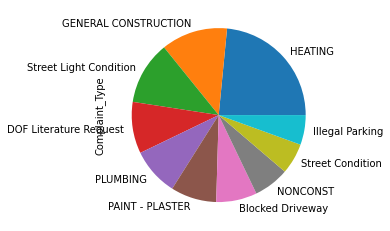

In [35]:
import matplotlib.pyplot as plt

graph.plot(kind='pie')
plt.show()

# 9. What's the most common `District` the complain came?
display top 10 most and plot them out

In [36]:
df['District'].value_counts().nlargest(10)

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: District, dtype: int64

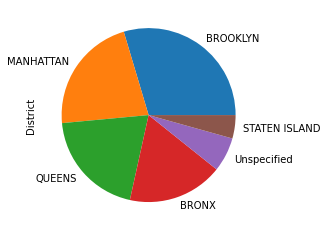

In [37]:
graph = df['District'].value_counts().nlargest(10)

graph.plot(kind='pie')
plt.show()

# 10. Select only top 10 Illegal Parking complains at  Queens district and save it to `new_complaint`. You can use `query`

In [40]:
df.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Address_Type', 'City', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'District',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Garage_Lot_Name', 'Ferry_Direction',
       'Ferry_Terminal_Name', 'Latitude', 'Longitude', 'Location',
       'created_date_year', 'created_date_month', 'created_date_hour',
       'created_date_minute', 'closed_date_year', 'closed_date_mo

In [45]:
df.query('Complaint_Type == "Illegal Parking" & District =="QUEENS"').head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Longitude,Location,created_date_year,created_date_month,created_date_hour,created_date_minute,closed_date_year,closed_date_month,closed_date_hour,closed_date_minute
1,26593698,2013-10-31 02:01:04,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",2013,10,2,1,NaN,NaN,NaN,NaN
116,26591037,2013-10-30 23:20:57,2013-10-31 02:16:39,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,-73.8511307325341,"(40.67347065165803, -73.8511307325341)",2013,10,23,20,2013.0,10.0,2.0,16.0
117,26592954,2013-10-30 23:20:26,2013-10-31 01:18:56,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,-73.7768682381755,"(40.73996897148448, -73.7768682381755)",2013,10,23,20,2013.0,10.0,1.0,18.0
140,26592551,2013-10-30 23:01:49,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,-73.8835552085296,"(40.726633034808366, -73.8835552085296)",2013,10,23,1,NaN,NaN,NaN,NaN
186,26591575,2013-10-30 22:33:28,2013-10-30 23:06:35,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,-73.75593130211928,"(40.608860268959695, -73.75593130211928)",2013,10,22,33,2013.0,10.0,23.0,6.0


In [48]:
new_complaint = df.query('Complaint_Type == "Illegal Parking" & District =="QUEENS"')

# 11 Filter top 3 columns `Complaint_Type,District, Created_Date,Descriptor` from the new_complaint

In [55]:
new_complaint = new_complaint[['Complaint_Type', 'District', 'Created_Date', 'Descriptor']]
new_complaint.head()

,Complaint_Type,District,Created_Date,Descriptor
1,Illegal Parking,QUEENS,2013-10-31 02:01:04,Commercial Overnight Parking
116,Illegal Parking,QUEENS,2013-10-30 23:20:57,Blocked Hydrant
117,Illegal Parking,QUEENS,2013-10-30 23:20:26,Posted Parking Sign Violation
140,Illegal Parking,QUEENS,2013-10-30 23:01:49,Commercial Overnight Parking
186,Illegal Parking,QUEENS,2013-10-30 22:33:28,Commercial Overnight Parking


# 12 Save `new_complaint` dataframe to CSV format and load it back to verify the data

In [56]:
new_complaint.to_csv('Updated_311-service-request.csv', index=False)

In [57]:
df_new = pd.read_csv('Updated_311-service-request.csv', index_col=0)

In [58]:
df_new.head(3)

,District,Created_Date,Descriptor
Complaint_Type,,,
Illegal Parking,QUEENS,2013-10-31 02:01:04,Commercial Overnight Parking
Illegal Parking,QUEENS,2013-10-30 23:20:57,Blocked Hydrant
Illegal Parking,QUEENS,2013-10-30 23:20:26,Posted Parking Sign Violation
